In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("churn_rate")

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_segment,monthly_charges_segment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,25-36,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12,Medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,Low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12,High


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Define the columns to check
df_col = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn'
]


In [19]:

# Iterate over each column and print unique values
for col in df_col:
    if col in df.columns:
        print(f"Unique values in column '{col}': {df[col].unique()}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': ['Yes' 'No']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'PhoneService': ['No' 'Yes']
Unique values in column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in column 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in column 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values in column 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in column 'PaperlessBilling': ['Yes' 'No']
Unique values i

In [21]:
# Segmentation based on tenure and monthly charges
df['tenure_segment'] = pd.cut(df['tenure'], bins=[-1, 0, 12, 24, 36, 48, 60, 72], labels=['0', '1-12', '13-24', '25-36', '37-48', '49-60', '61+'])
df['monthly_charges_segment'] = pd.cut(df['MonthlyCharges'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['tenure_segment'].value_counts()

tenure_segment
1-12     2175
61+      1407
13-24    1024
25-36     832
49-60     832
37-48     762
0          11
Name: count, dtype: int64

In [47]:
# Group the data by tenure_segment and monthly_charges_segment
grouped_data = df.groupby(['tenure_segment', 'monthly_charges_segment']).size().reset_index(name='count')

# Pivot the data to create a matrix
pivoted_data = grouped_data.pivot(index='tenure_segment', columns='monthly_charges_segment', values='count')


C:\Users\Ravi\AppData\Local\Temp\ipykernel_13316\4146011506.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['tenure_segment', 'monthly_charges_segment']).size().reset_index(name='count')


C:\Users\Ravi\AppData\Local\Temp\ipykernel_13316\2674837931.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
C:\Users\Ravi\AppData\Local\Temp\ipykernel_13316\2674837931.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


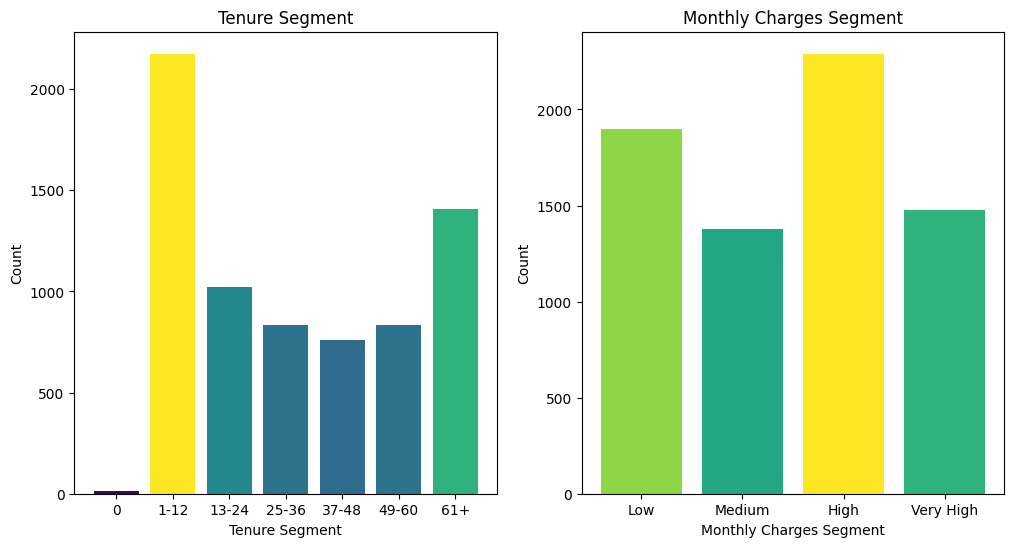

In [67]:

import matplotlib.cm as cm

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a bar plot for the tenure_segment data
cmap = cm.get_cmap('viridis')
ax1.bar(tenure_segment_data['tenure_segment'], tenure_segment_data['count'], color=[cmap(x) for x in tenure_segment_data['count'] / tenure_segment_data['count'].max()])
ax1.set_title('Tenure Segment')
ax1.set_xlabel('Tenure Segment')
ax1.set_ylabel('Count')

# Create a bar plot for the monthly_charges_segment data
cmap = cm.get_cmap('viridis')
ax2.bar(monthly_charges_segment_data['monthly_charges_segment'], monthly_charges_segment_data['count'], color=[cmap(x) for x in monthly_charges_segment_data['count'] / monthly_charges_segment_data['count'].max()])
ax2.set_title('Monthly Charges Segment')
ax2.set_xlabel('Monthly Charges Segment')
ax2.set_ylabel('Count')

# Show the plot
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x800 with 0 Axes>

In [47]:
# Set the plot style
sns.set(style="whitegrid")

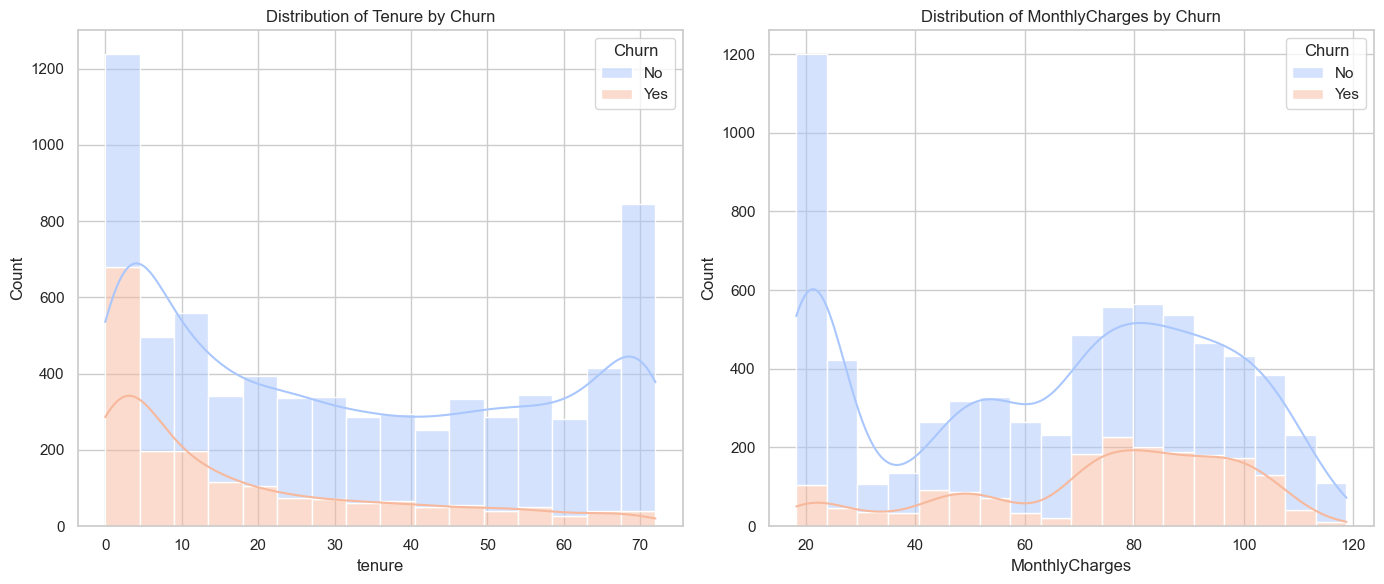

In [49]:
# Plot the distribution of tenure and MonthlyCharges by Churn
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df, x='tenure', hue='Churn', kde=True, multiple='stack', palette='coolwarm')
plt.title('Distribution of Tenure by Churn')

plt.subplot(1, 2, 2)
sns.histplot(df, x='MonthlyCharges', hue='Churn', kde=True, multiple='stack', palette='coolwarm')
plt.title('Distribution of MonthlyCharges by Churn')

plt.tight_layout()
plt.show()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_12136\3965964902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
C:\Users\Ravi\AppData\Local\Temp\ipykernel_12136\3965964902.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


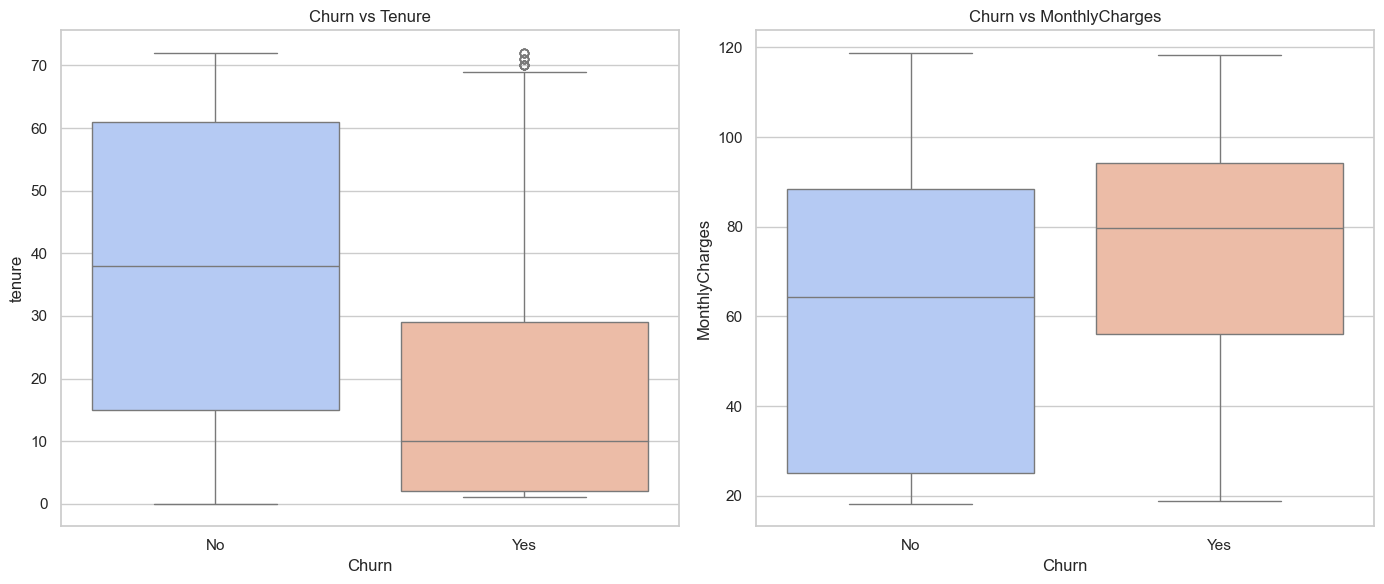

In [51]:
# Churn rate by customer segment: Tenure and MonthlyCharges
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Churn vs Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Churn vs MonthlyCharges')

plt.tight_layout()
plt.show()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_13316\4193994722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=df, palette='coolwarm')


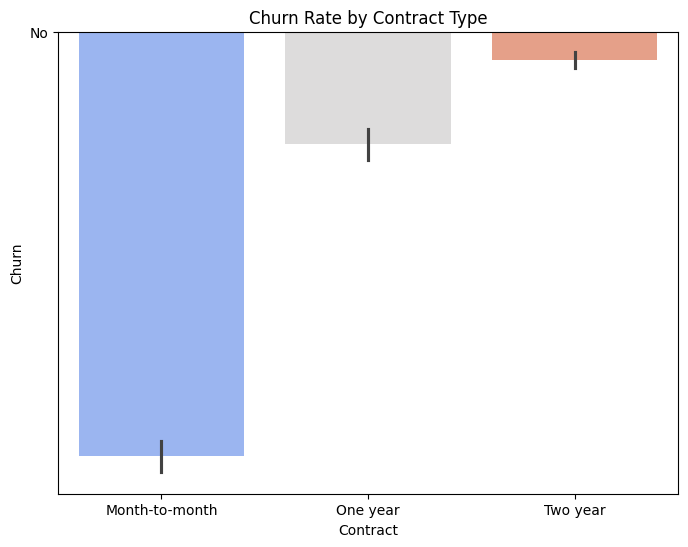

In [69]:
# Bar plot of Churn rate by Contract type
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn', data=df, palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.show()

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_segment,monthly_charges_segment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,25-36,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12,Medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,Low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12,High


In [73]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = min_max_scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [105]:
X = df.drop(columns=['customerID', 'monthly_charges_segment','Churn','tenure_segment'])
y = df['Churn']

In [107]:
# Further split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head(), y_train.head()

(      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
 1695       1              0        1           1  0.750000             1   
 1095       1              0        0           0  0.013889             1   
 3889       1              0        0           0  0.180556             1   
 3667       0              1        1           1  0.333333             1   
 2902       0              1        0           0  0.083333             1   
 
       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
 1695              2                0               0             2   
 1095              0                1               0             0   
 3889              0                2               1             1   
 3667              0                1               0             0   
 2902              0                1               2             0   
 
       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
 1695                 0     

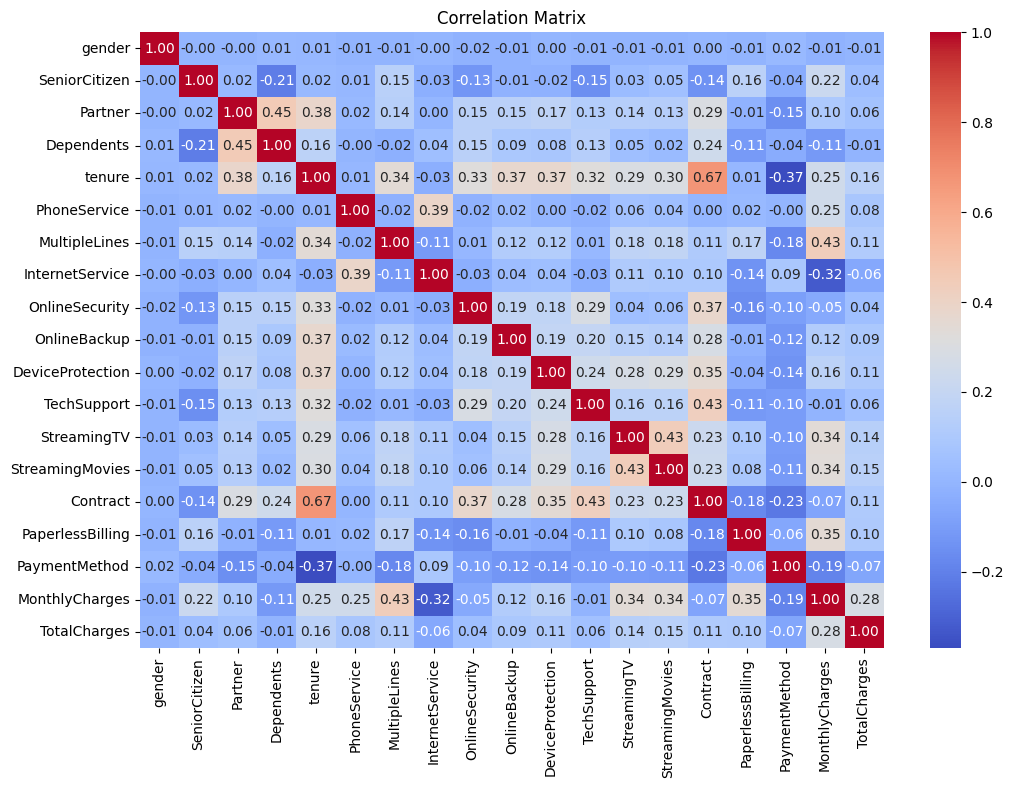

In [109]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.49      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.78      2113

ROC AUC Score: 0.6988468234724119


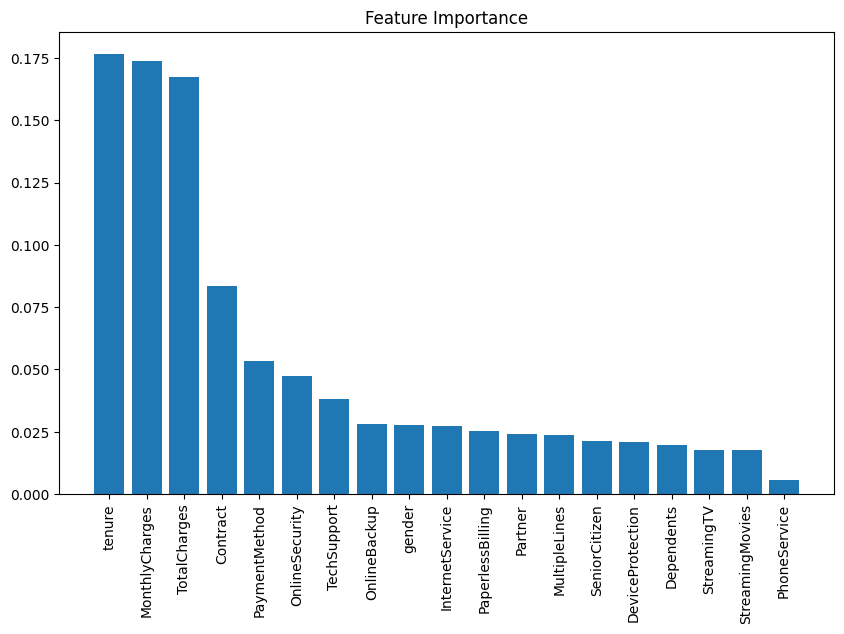

In [113]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


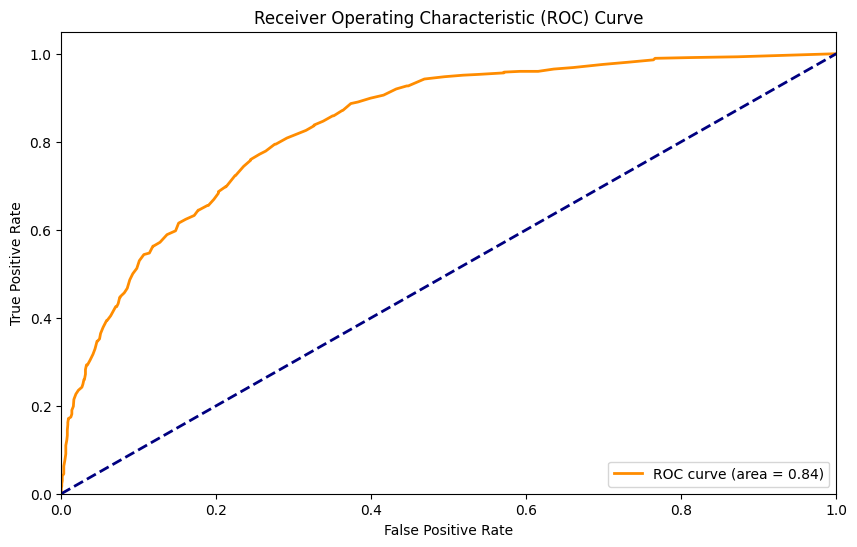

In [115]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


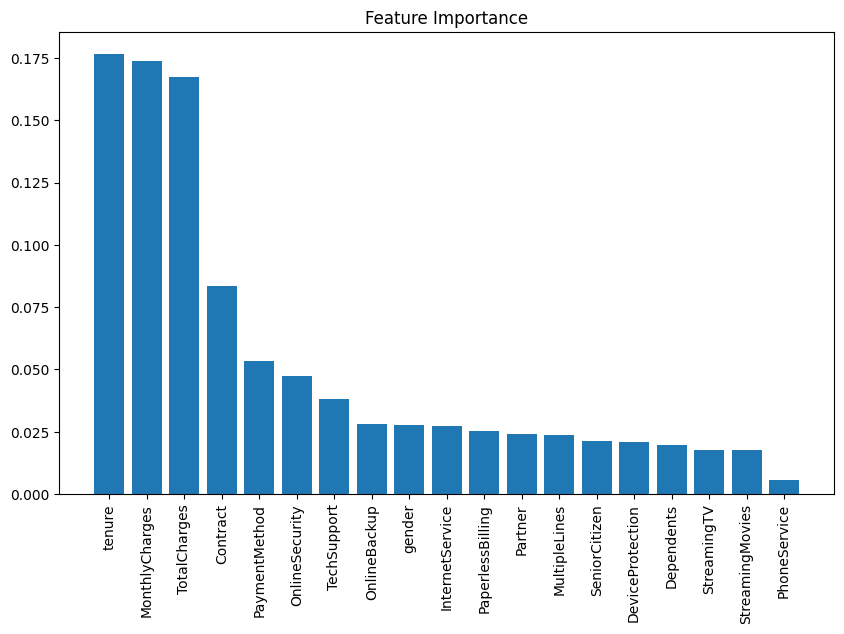

In [121]:
# For logistic regression (if applicable)
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": log_reg_model.coef_[0]})
coefficients.sort_values(by="Coefficient", ascending=False)

# For Random Forest
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
labels = kmeans.labels_

In [133]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Add the segment labels to the original DataFrame
df['segment'] = labels

# Calculate the churn rate by segment
churn_rate_by_segment = df.groupby('segment')['Churn'].mean()
print(churn_rate_by_segment)

segment
0    0.080229
1    0.462975
2    0.448087
3    0.116183
4    0.092543
Name: Churn, dtype: float64


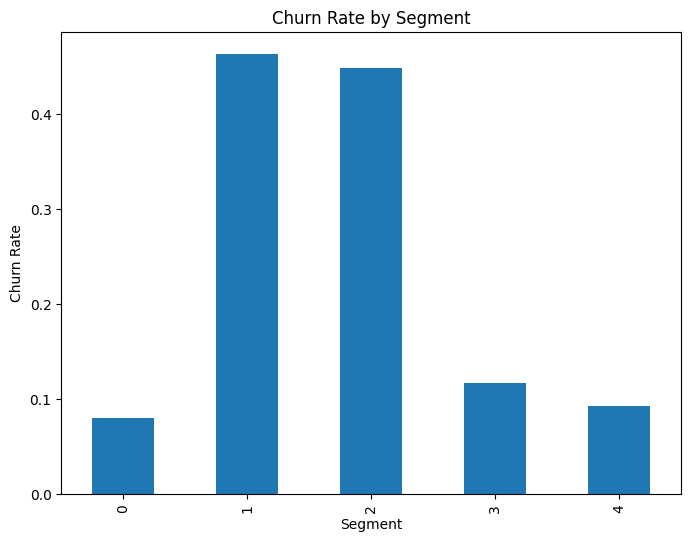

In [135]:
import matplotlib.pyplot as plt

# Plot the churn rate by segment
plt.figure(figsize=(8, 6))
churn_rate_by_segment.plot(kind='bar')
plt.title('Churn Rate by Segment')
plt.xlabel('Segment')
plt.ylabel('Churn Rate')
plt.show()

In [139]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=[int, float])

# Calculate the mean values of the numeric columns for each segment
segment_characteristics = numeric_cols.groupby('segment').mean()
print(segment_characteristics)

           gender  SeniorCitizen   Partner  Dependents    tenure  \
segment                                                            
0        0.489971       0.097421  0.587393    0.396848  0.593501   
1        0.511674       0.300867  0.481654    0.196798  0.431955   
2        0.504372       0.191257  0.286339    0.184153  0.189822   
3        0.522822       0.036515  0.450622    0.398340  0.348087   
4        0.495058       0.144654  0.712489    0.398922  0.829902   

         PhoneService  MultipleLines  InternetService  OnlineSecurity  \
segment                                                                 
0            0.925501       0.802292         1.178367        1.196275   
1            0.916611       1.509673         0.820547        0.237492   
2            0.857377       0.643169         0.487432        0.343169   
3            0.952697       0.329461         1.535270        1.093776   
4            0.878706       1.497754         0.477089        1.430368   

         On

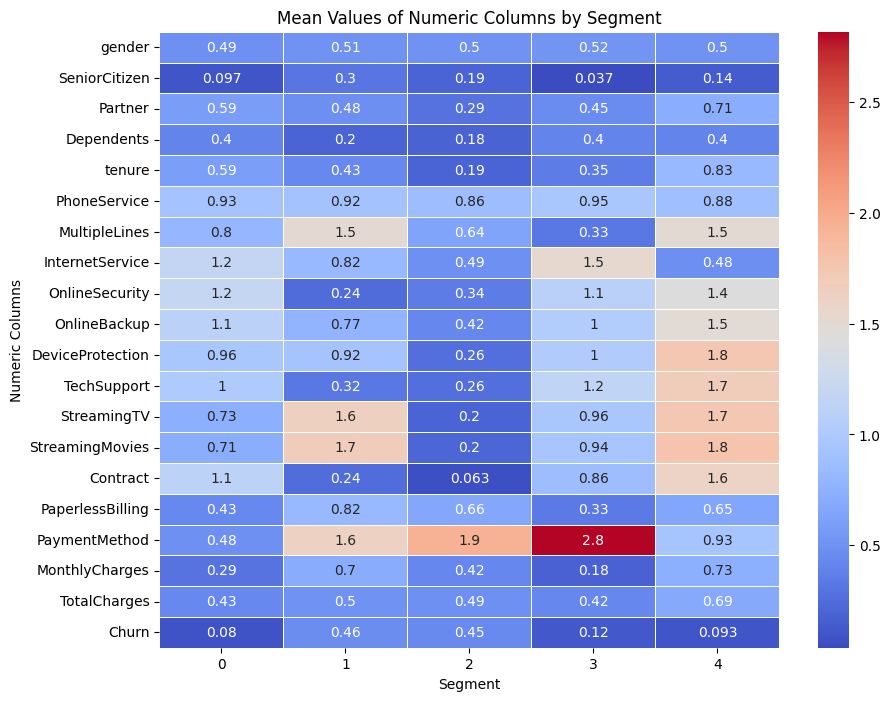

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the mean values of each numeric column for each segment
plt.figure(figsize=(10, 8))
sns.heatmap(segment_characteristics.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mean Values of Numeric Columns by Segment')
plt.xlabel('Segment')
plt.ylabel('Numeric Columns')
plt.show()


In [143]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


({'bootstrap': True,
  'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.8054766734279919)

In [145]:
# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred_best = best_model.predict(X_test)
classification_report_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

classification_report_best, roc_auc_best


('              precision    recall  f1-score   support\n\n           0       0.83      0.92      0.87      1539\n           1       0.69      0.50      0.58       574\n\n    accuracy                           0.80      2113\n   macro avg       0.76      0.71      0.73      2113\nweighted avg       0.79      0.80      0.79      2113\n',
 0.7077647823261858)

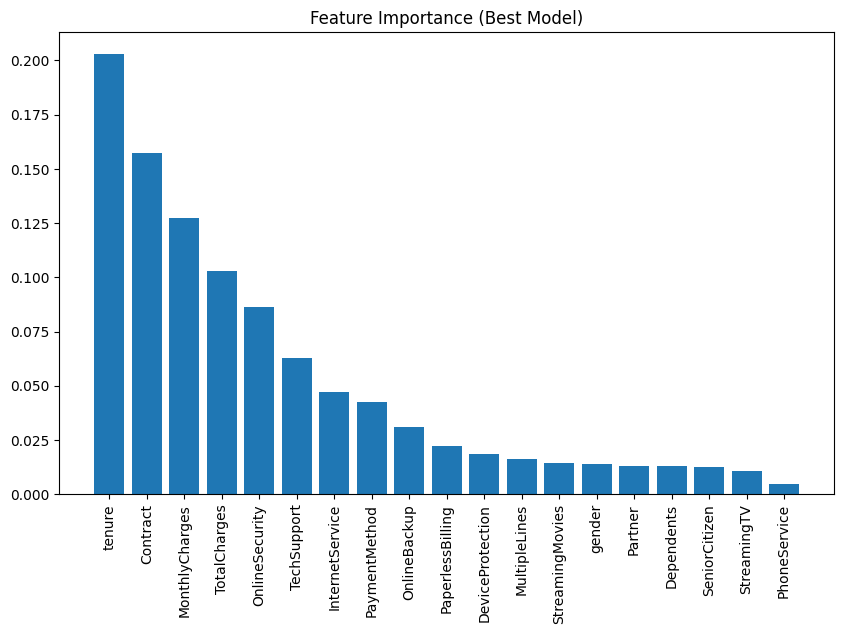

In [147]:
# Feature importance from the best model
importances_best = best_model.feature_importances_
indices_best = np.argsort(importances_best)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Best Model)')
plt.bar(range(X_train.shape[1]), importances_best[indices_best], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_best], rotation=90)
plt.show()


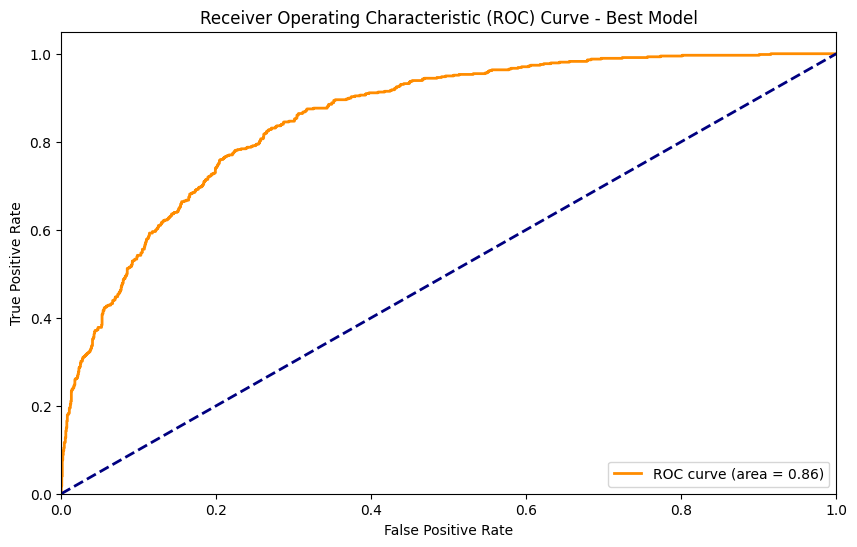

In [149]:
# Compute ROC curve and AUC for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Model')
plt.legend(loc="lower right")
plt.show()


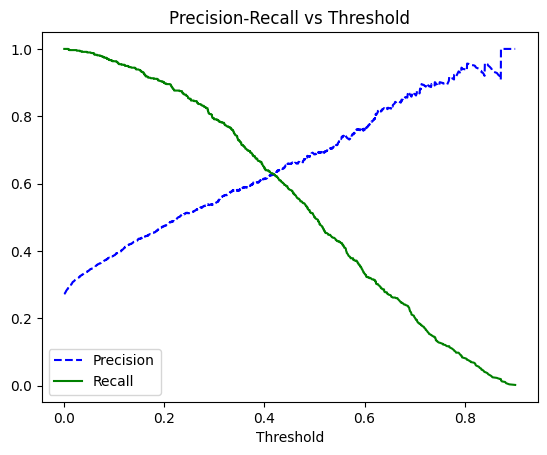

In [151]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_scores = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision-Recall vs Threshold")
plt.show()
